## COMPAS Recidivism Racial Bias EDA and DE

In [33]:
import numpy as np
import pandas as pd
import os
import altair as alt

In [34]:
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [35]:
work_dir = os.getcwd()
print("Working directory %s" % work_dir)

Working directory /Users/olehmisko/Desktop/UCU docs/Responsible-DS-2019/noble-model-audit


In [36]:
data_dir = os.path.join(work_dir, 'data')
print("Data directory %s" % data_dir)

Data directory /Users/olehmisko/Desktop/UCU docs/Responsible-DS-2019/noble-model-audit/data


In [37]:
compas_data_filename = 'compas-scores-raw.csv'
compas_data_filepath = os.path.join(data_dir, compas_data_filename)
compas_data = pd.read_csv(compas_data_filepath)

In [38]:
compas_data.head(5)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


First of all, we need to rename the columns for convenience.

In [39]:
compas_data_columns = ['person_id', 'assessment_id', 'case_id', 'agency_text', 
                       'last_name', 'first_name', 'middle_name', 'sex', 'nationality', 'birth_date',
                       'scale_set_id', 'scale_set', 'assessment_reason', 'language',
                       'legal_status', 'custody_status', 'marital_status', 'screening_date',
                       'rec_supervision_level_num', 'rec_supervision_level', 'scale_id',
                       'display_text', 'raw_score', 'decile_score', 'score_text', 'assessment_type',
                       'is_completed', 'is_deleted']

compas_data.columns = compas_data_columns
compas_data.head()

,person_id,assessment_id,case_id,agency_text,last_name,first_name,middle_name,sex,nationality,birth_date,...,rec_supervision_level_num,rec_supervision_level,scale_id,display_text,raw_score,decile_score,score_text,assessment_type,is_completed,is_deleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


A lot of columns provide unnecessary information for exploratory data analysis.

For example **language** column contains **100% of English data**. 
**assessment_reason** has only **intake** values.
Also, **is_completed** and **is_deleted** columns would not provide us a lot of valuable information.

Therefore, we need to remove some columns from the data frame.

In [40]:
columns_to_drop = ['person_id', 'assessment_id', 'scale_set_id', 
                   'language', 'screening_date', 'rec_supervision_level_num', 
                   'scale_id', 'is_completed', 'is_deleted']

In [41]:
compas_data = compas_data.drop(columns_to_drop, axis=1)
compas_data.head()

,case_id,agency_text,last_name,first_name,middle_name,sex,nationality,birth_date,scale_set,assessment_reason,legal_status,custody_status,marital_status,rec_supervision_level,display_text,raw_score,decile_score,score_text,assessment_type
0,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Single,Low,Risk of Violence,-2.08,4,Low,New
1,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Single,Low,Risk of Recidivism,-1.06,2,Low,New
2,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Single,Low,Risk of Failure to Appear,15.00,1,Low,New
3,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Married,Low,Risk of Violence,-2.84,2,Low,New
4,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Married,Low,Risk of Recidivism,-1.50,1,Low,New


Now, after taking a look at the data we can see that we have plenty of duplicates already in the first five rows. Therefore, it is necessary to remove duplicate data. We can safely search duplicates by **case_id** since it should be unique for each case.

In [42]:
compas_data = compas_data.drop_duplicates(subset = 'case_id')
compas_data.head()

,case_id,agency_text,last_name,first_name,middle_name,sex,nationality,birth_date,scale_set,assessment_reason,legal_status,custody_status,marital_status,rec_supervision_level,display_text,raw_score,decile_score,score_text,assessment_type
0,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Single,Low,Risk of Violence,-2.08,4,Low,New
3,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Married,Low,Risk of Violence,-2.84,2,Low,New
6,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Single,High,Risk of Violence,-1.20,8,High,New
9,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Significant Other,Medium,Risk of Violence,-1.29,7,Medium,New
12,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,Risk and Prescreen,Intake,Pretrial,Jail Inmate,Single,Low,Risk of Violence,-2.90,2,Low,New


# Distributionds EDA

## Distribution of nationalities in data

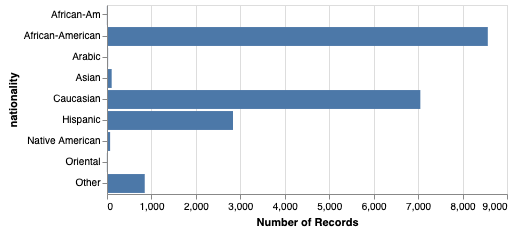

In [43]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='nationality')

We can spot a strange category of nationality "African-Am", which most probably is one or multiple typos. Thus, we need to change the values from "African-Am" to "African-American"

In [44]:
compas_data.nationality[compas_data.nationality == 'African-Am'] = 'African-American'

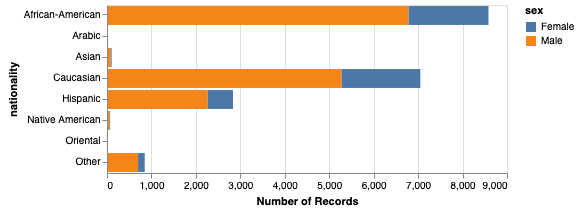

In [50]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='nationality', color = 'sex')

## Gender distribution in data

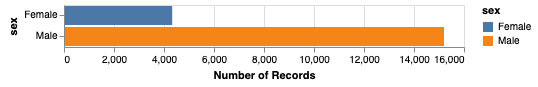

In [46]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='sex', color = 'sex')

It's obvious that most of the records correspond to Male gender, but the number of **Female cases is pretty huge as weel**. Female cases correspond **more than to 4k of cases**, it's less than **4x times**, than Male cases.

## Assessment reason distribution

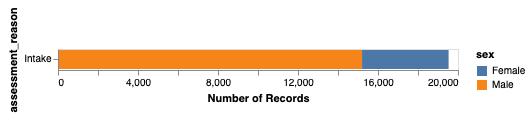

In [49]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='assessment_reason', color = 'sex')

The *assessment_reason* variable in 100% of cases has only **Intake** value, so it's not informative for us for comparison or analysis. It would be safe to drop this column for our dataset.

In [51]:
compas_data = compas_data.drop(['assessment_reason'], axis=1)

## Assessment status distribution

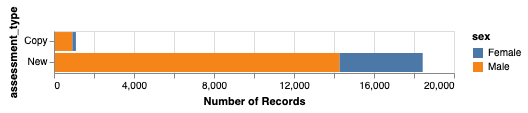

In [57]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='assessment_type', color = 'sex')

Not sure about this column overall and is it informative for example bias detection.

## Legal status distribution

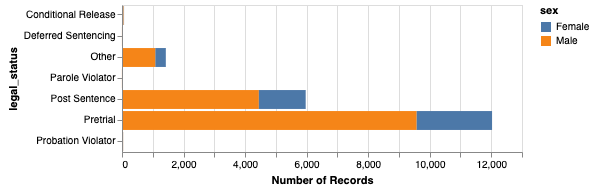

In [54]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='legal_status', color = 'sex')

Some explanation of the categories:
- **Post-sentence** supervision is a requirement which is applied to all offenders who receive a sentence of less than 2 years imprisonment.
- **Parole** is a conditional release from prison before the end of your sentence term is completed. Therefore, parole violation is convicting a crime in the period of pre-release.
- **Pretrial** is the part of the criminal justice system that begins when a person comes into contact with law enforcement (or the police) and ends when any resulting charges are resolved—usually through a dismissal, a plea, or a trial.
- **Probation violation** is an offense that occurs when you break the terms or conditions of your probation. 
- A **deferred sentence** is a sentence that is suspended until after a defendant has completed a period of probation. If the defendant fulfills the stipulations surrounding probation, a judge may then throw out the sentence and guilty plea, clearing the incident from their record.

## Marital status distribution

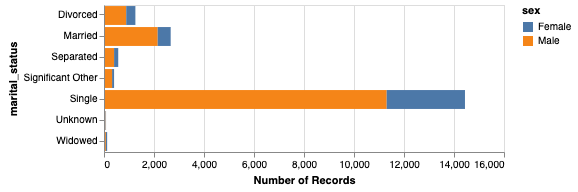

In [56]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='marital_status', color = 'sex')

Based on this histogram we can assume, that there might be a correlation between person's marital status and the probability of committing a crime. For example, we can infere that married people usually tend to make less crimes due to that they have spouse and, most probably, kids.

## Scale set distribution

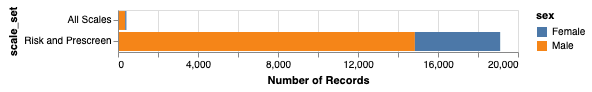

In [58]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='scale_set', color = 'sex')

I can't say much about this column and it's values since 'All scales' doesn't give a lot of information.

## Required supervision level

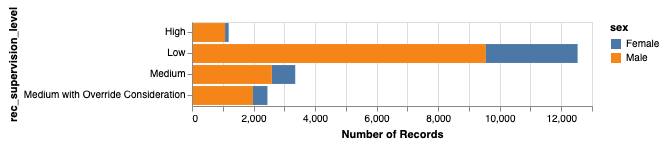

In [59]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='rec_supervision_level', color = 'sex')

We can see that most of the criminals require low level of supervision. We can assume, that they commited crimes of low or medium level. The other distributions seem to have decreasing trend in terms of magnitude of supervision "Medium < Medium with OC < High"

However, it's worth noticeable that **high level of supervision is required for more than 1 thousand criminals**, which is pretty huge number, if we will reflect what crimes do require this level.

## COMPAS Raw Score 

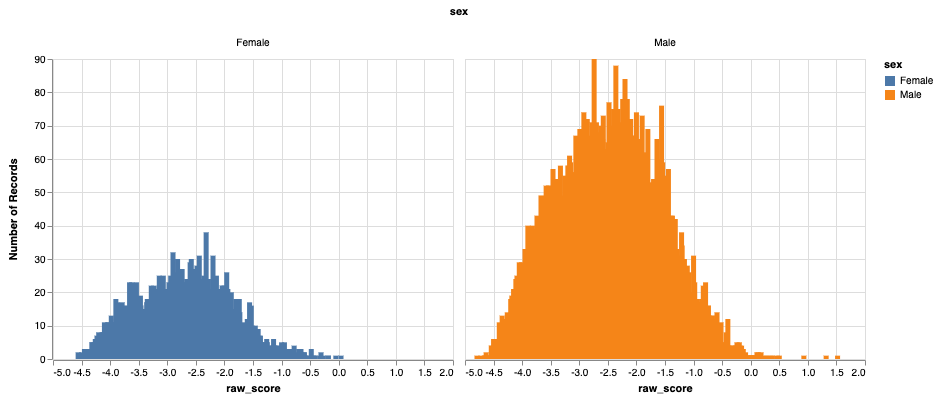

In [62]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'raw_score',
    y='count()', color = 'sex').facet(
    column='sex'
)

We can clearly see that for both men and women the distibution of scores (criminal defendant’s likelihood of reoffending (recidivism)) tend to the normal distribution with a little bit of skewness.

## COMPAS Score 

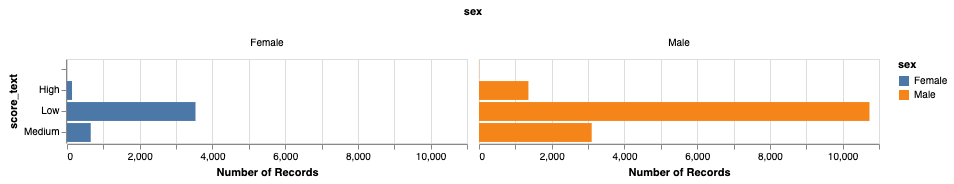

In [64]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'count()',
    y='score_text', color = 'sex').facet(
    column='sex'
)

In terms of text interpretation of COMPAS score we have three categories - **low, medium and high.** For both genders the tendencion is for low scores and it could also be correlated with the **required supervision level**, which showed pretty similar trend

# Correlation EDA

First interesting thing that I would like to check that is there a correlation between nationality and COMPAS score

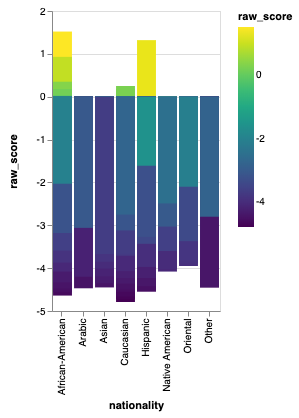

In [80]:
alt.Chart(compas_data).mark_rect().encode(
    x='nationality:O',
    y='raw_score:Q',
    color = 'raw_score'
)

We see that lowest scores are obtained by African-American, Caucasian and Hispanic people of both genders. Only 'other' nationality males tend to have as big deviation. 

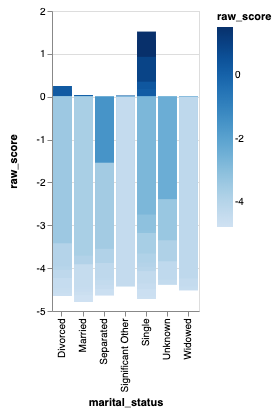

In [82]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'marital_status',
    y='raw_score:Q', color = 'raw_score')

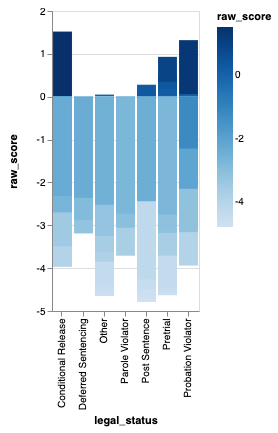

In [83]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'legal_status',
    y='raw_score:Q', color = 'raw_score')

We see that due to this plot **conditional release** and **probation violation** would correspond to bigger score of recidiv than other categories of legal status, as well as **pretrial.**

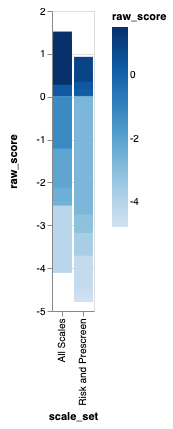

In [84]:
alt.Chart(compas_data).mark_bar().encode(
    x = 'scale_set',
    y='raw_score:Q', color = 'raw_score')

# General insights about the data

- Single people tend to do more crimes.
- Most of the crimes are made by african-american, caucasian and hispanic nationalities.
- Most of the cases require low supervision level.
- COMPAS raw score is roughly normally distributed for both genders.
- Males correspond to less than 4x times bigger amount of crimes than females.

# Saving the cleaned data

In [85]:
compas_data_cleaned_path = os.path.join(data_dir, 'compass_scores_cleaned.csv')
compas_data.to_csv(path_or_buf = compas_data_cleaned_path)